In [ ]:
!git clone https://github.com/BNUCNL/dnnbrain.git

Cloning into 'dnnbrain'...
remote: Enumerating objects: 5558, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 5558 (delta 55), reused 73 (delta 34), pack-reused 5433
Receiving objects: 100% (5558/5558), 9.85 MiB | 37.48 MiB/s, done.
Resolving deltas: 100% (3580/3580), done.


In [ ]:
%cd dnnbrain

/content/dnnbrain


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '1.0a' to '1.0a0'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
creating dnnbrain.egg-info
writing dnnbrain.egg-info/PKG-INFO
writing dependency_links to dnnbrain.egg-info/dependency_links.txt
writing top-level names to dnnbrain.egg-info/top_level.txt
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/dnnbrain
copying dnnbrain/__init__.py -> build/lib/dnnbrain
creating build/lib/dnnbrain/utils
copying dnnbrain/utils/__init__.py -> build/lib/dnnbrain/utils
copying dnnbrain/utils/vggish_input.py -> build/lib/dnnbrain/utils
copying dnnbrain/utils/vggish_params.py -> build/lib/dnnbrain/utils
copying dnnbrain/utils/util.py -> buil

In [ ]:
!pip install cifti
!pip install nipy

     |████████████████████████████████| 2.3MB 27.6MB/s 


In [ ]:
import os
os.environ['DNNBRAIN_DATA'] = os.path.abspath('data');
os.environ['PATH'] = os.path.abspath('bin') + ":" + os.getenv('PATH');
os.environ['PYTHONPATH'] = os.path.abspath('.') + ":" + os.getenv('PYTHONPATH');
print(os.environ['DNNBRAIN_DATA'])
print(os.environ['PATH'])
print(os.environ['PYTHONPATH'])

/content/dnnbrain/data
/content/dnnbrain/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
/content/dnnbrain:/env/python


In [ ]:
!mkdir data

In [ ]:
%cd /content/dnnbrain/data

/content/dnnbrain/data


In [ ]:
!mkdir models

In [ ]:
%cd /content/dnnbrain

/content/dnnbrain


In [ ]:
!mkdir tutorial

In [ ]:
%cd /content/dnnbrain/tutorial

/content/dnnbrain/tutorial


In [ ]:
!mkdir scan_dnn
!mkdir map_dnn
!mkdir visual

In [ ]:
%cd /content/dnnbrain/data

/content/dnnbrain/data


In [ ]:
import requests

In [ ]:
url = "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth"
p = requests.get(url, allow_redirects=True)
models_path = os.path.abspath('models/alexnet.pth')
open(models_path, 'wb').write(p.content)

244418560

In [ ]:
url = "https://osf.io/hy5m7/download"
m = requests.get(url, allow_redirects=True)
pt = os.path.abspath('presented_stimuli.tar.gz')
open(pt, 'wb').write(m.content)

340442148

In [ ]:
!tar -xvzf presented_stimuli.tar.gz

Presented_Stimuli/
Presented_Stimuli/ImageNet/
Presented_Stimuli/ImageNet/n02834397_15612.JPEG
Presented_Stimuli/ImageNet/n04099969_3551.JPEG
Presented_Stimuli/ImageNet/n02276258_5118.JPEG
Presented_Stimuli/ImageNet/n02981792_3265.JPEG
Presented_Stimuli/ImageNet/n02843684_21806.JPEG
Presented_Stimuli/ImageNet/n04399382_2877.JPEG
Presented_Stimuli/ImageNet/n02797295_13746.JPEG
Presented_Stimuli/ImageNet/n04243546_5419.JPEG
Presented_Stimuli/ImageNet/n02113799_8764.JPEG
Presented_Stimuli/ImageNet/n02087046_4402.JPEG
Presented_Stimuli/ImageNet/n02097474_11481.JPEG
Presented_Stimuli/ImageNet/n04275548_4656.JPEG
Presented_Stimuli/ImageNet/n03445924_6637.JPEG
Presented_Stimuli/ImageNet/n03944341_8299.JPEG
Presented_Stimuli/ImageNet/n03776460_19270.JPEG
Presented_Stimuli/ImageNet/n04204238_15792.JPEG
Presented_Stimuli/ImageNet/n04356056_8602.JPEG
Presented_Stimuli/ImageNet/n01601694_8281.JPEG
Presented_Stimuli/ImageNet/n03017168_3695.JPEG
Presented_Stimuli/ImageNet/n03991062_92.JPEG
Presented

In [ ]:
%cd /content/dnnbrain/tutorial/scan_dnn

/content/dnnbrain/tutorial/scan_dnn


In [ ]:
!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu -stim examples.stim.csv -cuda -out AlexNet_relu.act.h5

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv1_relu: 3/3
Extracted activation of conv2_relu: 3/3
Extracted activation of conv3_relu: 3/3
Extracted activation of conv4_relu: 3/3
Extracted activation of conv5_relu: 3/3


In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [ ]:
import numpy

maximal channel indices:
 [[ 52 154 216  56  77]
 [  8 129 233  19  26]
 [ 40 134  30 254 133]]


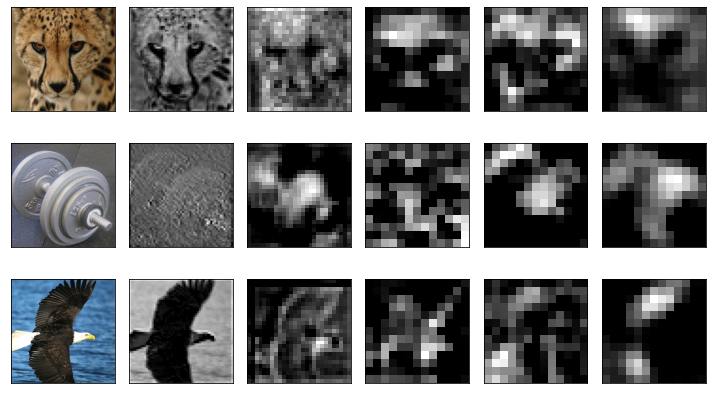

In [ ]:
import numpy as np

from os.path import join as pjoin

from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

# initialize an array to save maximal channel indices
n_img = 3  # the number of example images
n_layer = 5  # the number of Conv layers
max_chn_indices = np.zeros((n_img, n_layer), np.int)

# load feature maps
activ = Activation()
activ.load('AlexNet_relu.act.h5')

# find maximal channel indices for each layer
activ_pool = activ.pool('mean')  # calculate mean value of each channel
for idx, layer in enumerate(activ_pool.layers):
    data = activ_pool.get(layer).squeeze()
    max_chn_indices[:, idx] = np.argmax(data, 1)
print('maximal channel indices:\n', max_chn_indices)

# load stimulus information
stim = Stimulus()
stim.load('examples.stim.csv')

# plot original images and feature maps
img_arrs = []
for idx, row in enumerate(max_chn_indices):
    ori_file = pjoin(stim.header['path'], stim.get('stimID')[idx])  # get path of the original file
    img_arrs.append(plt.imread(ori_file))
    for lyr_idx, max_chn_idx in enumerate(row):
        layer = activ.layers[lyr_idx]
        img_arrs.append(activ.get(layer)[idx, max_chn_idx])
imgarray_show(img_arrs, nrows=n_img, ncols=n_layer+1, cmap='gray')

In [ ]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [ ]:
%cd /content/dnnbrain/tutorial/map_dnn

/content/dnnbrain/tutorial/map_dnn


In [ ]:
!dnn_act -net AlexNet -layer conv1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu1.act.h5 -cuda

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv1_relu: 8/4916
Extracted activation of conv1_relu: 16/4916
Extracted activation of conv1_relu: 24/4916
Extracted activation of conv1_relu: 32/4916
Extracted activation of conv1_relu: 40/4916
Extracted activation of conv1_relu: 48/4916
Extracted activation of conv1_relu: 56/4916
Extracted activation of conv1_relu: 64/4916
Extracted activation of conv1_relu: 72/4916
Extracted activation of conv1_relu: 80/4916
Extracted activation of conv1_relu: 88/4916
Extracted activation of conv1_relu: 96/4916
Extracted activation of conv1_relu: 104/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer conv2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu2.act.h5 -cuda

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv2_relu: 8/4916
Extracted activation of conv2_relu: 16/4916
Extracted activation of conv2_relu: 24/4916
Extracted activation of conv2_relu: 32/4916
Extracted activation of conv2_relu: 40/4916
Extracted activation of conv2_relu: 48/4916
Extracted activation of conv2_relu: 56/4916
Extracted activation of conv2_relu: 64/4916
Extracted activation of conv2_relu: 72/4916
Extracted activation of conv2_relu: 80/4916
Extracted activation of conv2_relu: 88/4916
Extracted activation of conv2_relu: 96/4916
Extracted activation of conv2_relu: 104/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer conv3_relu -stim all_5000scenes.stim.csv -out AlexNet_relu3.act.h5 -cuda

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv3_relu: 8/4916
Extracted activation of conv3_relu: 16/4916
Extracted activation of conv3_relu: 24/4916
Extracted activation of conv3_relu: 32/4916
Extracted activation of conv3_relu: 40/4916
Extracted activation of conv3_relu: 48/4916
Extracted activation of conv3_relu: 56/4916
Extracted activation of conv3_relu: 64/4916
Extracted activation of conv3_relu: 72/4916
Extracted activation of conv3_relu: 80/4916
Extracted activation of conv3_relu: 88/4916
Extracted activation of conv3_relu: 96/4916
Extracted activation of conv3_relu: 104/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer conv4_relu -stim all_5000scenes.stim.csv -out AlexNet_relu4.act.h5 -cuda

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv4_relu: 8/4916
Extracted activation of conv4_relu: 16/4916
Extracted activation of conv4_relu: 24/4916
Extracted activation of conv4_relu: 32/4916
Extracted activation of conv4_relu: 40/4916
Extracted activation of conv4_relu: 48/4916
Extracted activation of conv4_relu: 56/4916
Extracted activation of conv4_relu: 64/4916
Extracted activation of conv4_relu: 72/4916
Extracted activation of conv4_relu: 80/4916
Extracted activation of conv4_relu: 88/4916
Extracted activation of conv4_relu: 96/4916
Extracted activation of conv4_relu: 104/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer conv5_relu -stim all_5000scenes.stim.csv -out AlexNet_relu5.act.h5 -cuda

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of conv5_relu: 8/4916
Extracted activation of conv5_relu: 16/4916
Extracted activation of conv5_relu: 24/4916
Extracted activation of conv5_relu: 32/4916
Extracted activation of conv5_relu: 40/4916
Extracted activation of conv5_relu: 48/4916
Extracted activation of conv5_relu: 56/4916
Extracted activation of conv5_relu: 64/4916
Extracted activation of conv5_relu: 72/4916
Extracted activation of conv5_relu: 80/4916
Extracted activation of conv5_relu: 88/4916
Extracted activation of conv5_relu: 96/4916
Extracted activation of conv5_relu: 104/4916
Extracted activation of 

In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain


In [ ]:
from scipy.stats import zscore
from dnnbrain.dnn.core import Activation

activ_file_list = ['AlexNet_relu1.act.h5', 'AlexNet_relu2.act.h5', 'AlexNet_relu3.act.h5', 'AlexNet_relu4.act.h5', 'AlexNet_relu5.act.h5']
out_file_list = ['AlexNet_relu1_zscore.act.h5', 'AlexNet_relu2_zscore.act.h5', 'AlexNet_relu3_zscore.act.h5', 'AlexNet_relu4_zscore.act.h5', 'AlexNet_relu5_zscore.act.h5']

for i in range(5):
  activ = Activation()
  activ.load(activ_file_list[i])
  for layer in activ.layers:
      activ_arr = activ.get(layer)
      shape = activ_arr.shape
      activ_arr = activ_arr.reshape((shape[0], -1))
      activ_arr = zscore(activ_arr, axis=1)
      activ.set(layer, activ_arr.reshape(shape))
  activ.save(out_file_list[i])

In [ ]:
url = "https://osf.io/ube86/download"
p = requests.get(url, allow_redirects=True)
models_path = os.path.abspath('beta_rh_all_run.nii.gz')
open(models_path, 'wb').write(p.content)

773222549

In [ ]:
url = "https://osf.io/w7ved/download"
p = requests.get(url, allow_redirects=True)
models_path = os.path.abspath('VTC_mask_rh.nii.gz')
open(models_path, 'wb').write(p.content)



560

In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu4_zscore.act.h5')   ###### change here ######

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# build pipeline with PCA and LinearRegression
pipe = make_pipeline(PCA(100), LinearRegression())

# initialize encode method with brain activation
# mv: multivariate mapping
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', pipe, 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_zscore_PCA-100_glm_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 15.61402416229248 seconds
Finish CV-2/10, cost 15.3194580078125 seconds
Finish CV-3/10, cost 15.237972259521484 seconds
Finish CV-4/10, cost 15.354604005813599 seconds
Finish CV-5/10, cost 15.167682409286499 seconds
Finish CV-6/10, cost 15.230559587478638 seconds
Finish CV-7/10, cost 15.346102952957153 seconds
Finish CV-8/10, cost 15.14257264137268 seconds
Finish CV-9/10, cost 15.068277835845947 seconds
Finish CV-10/10, cost 15.36534857749939 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 185.1477723121643 seconds.
Layer-conv4_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu3_zscore.act.h5')   ###### change here ######

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# build pipeline with PCA and LinearRegression
pipe = make_pipeline(PCA(100), LinearRegression())

# initialize encode method with brain activation
# mv: multivariate mapping
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', pipe, 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_zscore_PCA-100_glm_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 22.51464319229126 seconds
Finish CV-2/10, cost 21.87076449394226 seconds
Finish CV-3/10, cost 21.83403444290161 seconds
Finish CV-4/10, cost 22.286201238632202 seconds
Finish CV-5/10, cost 22.356656789779663 seconds
Finish CV-6/10, cost 22.408265352249146 seconds
Finish CV-7/10, cost 23.36366891860962 seconds
Finish CV-8/10, cost 22.74166250228882 seconds
Finish CV-9/10, cost 21.760507583618164 seconds
Finish CV-10/10, cost 21.995234727859497 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 270.11336755752563 seconds.
Layer-conv3_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu2_zscore.act.h5')   ###### change here ######

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# build pipeline with PCA and LinearRegression
pipe = make_pipeline(PCA(100), LinearRegression())

# initialize encode method with brain activation
# mv: multivariate mapping
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', pipe, 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_zscore_PCA-100_glm_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 48.828718423843384 seconds
Finish CV-2/10, cost 48.18682670593262 seconds
Finish CV-3/10, cost 47.24275279045105 seconds
Finish CV-4/10, cost 47.7769136428833 seconds
Finish CV-5/10, cost 47.575366735458374 seconds
Finish CV-6/10, cost 48.30536603927612 seconds
Finish CV-7/10, cost 48.6702823638916 seconds
Finish CV-8/10, cost 47.58754253387451 seconds
Finish CV-9/10, cost 48.345601081848145 seconds
Finish CV-10/10, cost 49.78428268432617 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 584.9599604606628 seconds.
Layer-conv2_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu5_zscore.act.h5')   ###### change here ######

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# build pipeline with PCA and LinearRegression
pipe = make_pipeline(PCA(100), LinearRegression())

# initialize encode method with brain activation
# mv: multivariate mapping
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', pipe, 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_zscore_PCA-100_glm_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 14.728434801101685 seconds
Finish CV-2/10, cost 14.930887460708618 seconds
Finish CV-3/10, cost 15.1292564868927 seconds
Finish CV-4/10, cost 15.271836519241333 seconds
Finish CV-5/10, cost 15.04907512664795 seconds
Finish CV-6/10, cost 15.597683429718018 seconds
Finish CV-7/10, cost 15.806135177612305 seconds
Finish CV-8/10, cost 16.032708883285522 seconds
Finish CV-9/10, cost 15.404154539108276 seconds
Finish CV-10/10, cost 14.954244375228882 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 185.2227122783661 seconds.
Layer-conv5_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.cross_decomposition import PLSRegression
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu3.act.h5')

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# initialize encode method with brain activation
# mv: multivariate mapping
# use PLS regression with 10 components
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', PLSRegression(10), 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_pls-10_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 75.09044051170349 seconds
Finish CV-2/10, cost 80.28270411491394 seconds
Finish CV-3/10, cost 78.48012351989746 seconds
Finish CV-4/10, cost 78.48638653755188 seconds
Finish CV-5/10, cost 75.93485140800476 seconds
Finish CV-6/10, cost 76.13039469718933 seconds
Finish CV-7/10, cost 74.04180335998535 seconds
Finish CV-8/10, cost 74.30296039581299 seconds
Finish CV-9/10, cost 72.12855315208435 seconds
Finish CV-10/10, cost 76.2614517211914 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 874.1681866645813 seconds.
Layer-conv3_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.cross_decomposition import PLSRegression
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu4.act.h5')

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# initialize encode method with brain activation
# mv: multivariate mapping
# use PLS regression with 10 components
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', PLSRegression(10), 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_pls-10_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 45.697611570358276 seconds
Finish CV-2/10, cost 46.18641901016235 seconds
Finish CV-3/10, cost 42.21565771102905 seconds
Finish CV-4/10, cost 55.929274797439575 seconds
Finish CV-5/10, cost 45.7775444984436 seconds
Finish CV-6/10, cost 43.288065671920776 seconds
Finish CV-7/10, cost 44.717915534973145 seconds
Finish CV-8/10, cost 46.05577373504639 seconds
Finish CV-9/10, cost 51.344422340393066 seconds
Finish CV-10/10, cost 45.42650628089905 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 535.8397405147552 seconds.
Layer-conv4_relu iter-1/1


In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.cross_decomposition import PLSRegression
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu5.act.h5')

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# initialize encode method with brain activation
# mv: multivariate mapping
# use PLS regression with 10 components
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', PLSRegression(10), 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_pls-10_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 48.44276452064514 seconds
Finish CV-2/10, cost 49.48061442375183 seconds
Finish CV-3/10, cost 49.063488721847534 seconds
Finish CV-4/10, cost 47.4295814037323 seconds
Finish CV-5/10, cost 50.59279799461365 seconds
Finish CV-6/10, cost 49.24942755699158 seconds
Finish CV-7/10, cost 46.80934238433838 seconds
Finish CV-8/10, cost 49.082672119140625 seconds
Finish CV-9/10, cost 48.03213310241699 seconds
Finish CV-10/10, cost 51.00533318519592 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 560.2779002189636 seconds.
Layer-conv5_relu iter-1/1


In [ ]:
%cd /content/dnnbrain
!rm -rf brain dnn io utils viz __init__.py
%cd tutorial/map_dnn

/content/dnnbrain
/content/dnnbrain/tutorial/map_dnn


In [ ]:
!pwd
###crash layer 1

/content/dnnbrain/tutorial/map_dnn


In [ ]:
!dnn_fe -act AlexNet_relu2_zscore.act.h5 -meth pca 100 -out AlexNet_relu2_zscore_PCA-100.act.h5

tcmalloc: large alloc 2752331776 bytes == 0x55becf888000 @  0x7f886cbc51e7 0x7f886a03246e 0x7f886a082c7b 0x7f886a08335f 0x7f886a125103 0x55bec9320d54 0x55bec9320a50 0x55bec9395105 0x55bec938f4ae 0x55bec9261eb1 0x7f885a82a9dc 0x7f885a83631c 0x55bec932298d 0x55bec9320f6f 0x55bec9323bfe 0x7f886a08186c 0x7f886a084a93 0x7f886a0850bc 0x7f886a085cbb 0x7f886a08607b 0x7f886a127761 0x55bec9320d54 0x55bec9320a50 0x55bec9395105 0x55bec938f4ae 0x55bec93223ea 0x55bec93947f0 0x55bec938f4ae 0x55bec93223ea 0x55bec939060e 0x55bec938f4ae
tcmalloc: large alloc 2752331776 bytes == 0x55bf788fc000 @  0x7f886cbc51e7 0x7f886a03246e 0x7f886a082c7b 0x7f886a082d97 0x7f886a07c4a5 0x7f886a1279d0 0x55bec9320d54 0x55bec9320a50 0x55bec9395105 0x55bec938f4ae 0x55bec93223ea 0x55bec939132a 0x55bec932230a 0x55bec939060e 0x55bec938f4ae 0x55bec93223ea 0x55bec939060e 0x55bec938f4ae 0x55bec93223ea 0x55bec93903b5 0x55bec938f4ae 0x55bec93223ea 0x55bec939060e 0x55bec932230a 0x55bec93903b5 0x55bec938f4ae 0x55bec938f1b3 0x55bec945

In [ ]:
!dnn_fe -act AlexNet_relu3_zscore.act.h5 -meth pca 100 -out AlexNet_relu3_zscore_PCA-100.act.h5

tcmalloc: large alloc 1276116992 bytes == 0x5603086d8000 @  0x7f6f253321e7 0x7f6f2279f46e 0x7f6f227efc7b 0x7f6f227f035f 0x7f6f22892103 0x560301c1dd54 0x560301c1da50 0x560301c92105 0x560301c8c4ae 0x560301b5eeb1 0x7f6f12f979dc 0x7f6f12fa331c 0x560301c1f98d 0x560301c1df6f 0x560301c20bfe 0x7f6f227ee86c 0x7f6f227f1a93 0x7f6f227f20bc 0x7f6f227f2cbb 0x7f6f227f307b 0x7f6f22894761 0x560301c1dd54 0x560301c1da50 0x560301c92105 0x560301c8c4ae 0x560301c1f3ea 0x560301c917f0 0x560301c8c4ae 0x560301c1f3ea 0x560301c8d60e 0x560301c8c4ae
tcmalloc: large alloc 1276116992 bytes == 0x560359978000 @  0x7f6f253321e7 0x7f6f2279f46e 0x7f6f227efc7b 0x7f6f227efd97 0x7f6f227e94a5 0x7f6f228949d0 0x560301c1dd54 0x560301c1da50 0x560301c92105 0x560301c8c4ae 0x560301c1f3ea 0x560301c8e32a 0x560301c1f30a 0x560301c8d60e 0x560301c8c4ae 0x560301c1f3ea 0x560301c8d60e 0x560301c8c4ae 0x560301c1f3ea 0x560301c8d3b5 0x560301c8c4ae 0x560301c1f3ea 0x560301c8d60e 0x560301c1f30a 0x560301c8d3b5 0x560301c8c4ae 0x560301c8c1b3 0x560301d5

In [ ]:
!dnn_fe -act AlexNet_relu4_zscore.act.h5 -meth pca 100 -out AlexNet_relu4_zscore_PCA-100.act.h5

In [ ]:
!dnn_fe -act AlexNet_relu5_zscore.act.h5 -meth pca 100 -out AlexNet_relu5_zscore_PCA-100.act.h5

In [ ]:
!dnn_rsa -act AlexNet_relu2_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu2_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu2_zscore_PCA-100.act.h5
Finished layer-conv2_relu: cost 0.7335073947906494 seconds


In [ ]:
!dnn_rsa -act AlexNet_relu3_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu3_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu3_zscore_PCA-100.act.h5
Finished layer-conv3_relu: cost 0.7193400859832764 seconds


In [ ]:
!dnn_rsa -act AlexNet_relu4_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu4_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu4_zscore_PCA-100.act.h5
Finished layer-conv4_relu: cost 0.7454814910888672 seconds


In [ ]:
!dnn_rsa -act AlexNet_relu5_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu5_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu5_zscore_PCA-100.act.h5
Finished layer-conv5_relu: cost 0.7460274696350098 seconds


In [ ]:
!brain_rsa -nif beta_rh_all_run.nii.gz -bmask VTC_mask_rh.nii.gz -metric correlation -out beta_rh_VTC.rdm.h5

tcmalloc: large alloc 1277845504 bytes == 0x5605f4894000 @  0x7f52df50a1e7 0x5605ef6ebed8 0x5605ef7a56b0 0x5605ef7a510e 0x5605ef6f8cc4 0x5605ef6b9462 0x5605ef72c715 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6baa81 0x5605ef6b8f6f 0x5605ef6bbbfe 0x7f52dd09986c 0x7f52dd09ca93 0x7f52dd09d0bc 0x7f52dd09dcbb 0x7f52dd09e07b 0x7f52dd13f761 0x5605ef6b8d54 0x5605ef6b8a50 0x5605ef72d105 0x5605ef7274ae 0x5605ef6ba3ea
tcmalloc: large alloc 1277845504 bytes == 0x560640b3a000 @  0x7f52df50a1e7 0x5605ef6eae68 0x5605ef6b5637 0x5605ef796a6e 0x5605ef6b8b59 0x5605ef7a9fed 0x5605ef72c988 0x5605ef7274ae 0x5605ef6baa81 0x5605ef6b8f6f 0x5605ef6bc0b6 0x5605ef68fe1c 0x5605ef68fca1 0x5605ef6b8afd 0x5605ef7a9fed 0x5605ef72c988 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6ba3ea 0x5605ef72932a 0x5605ef7274ae 0x5605ef6baa81 0x5605ef6b

In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

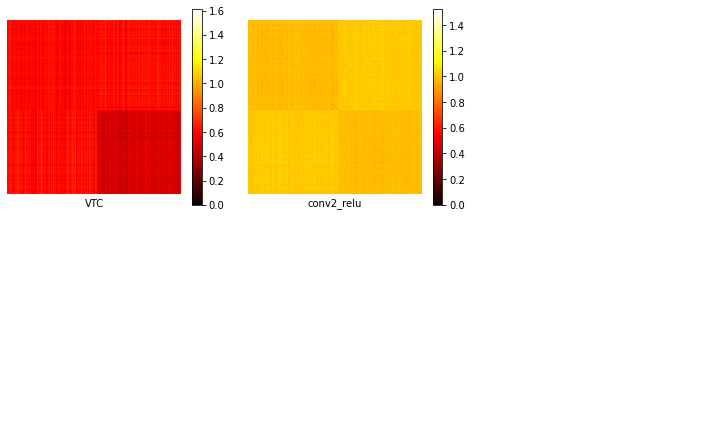

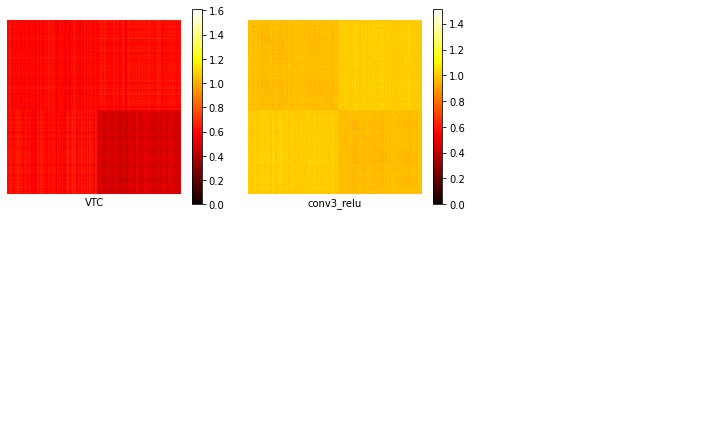

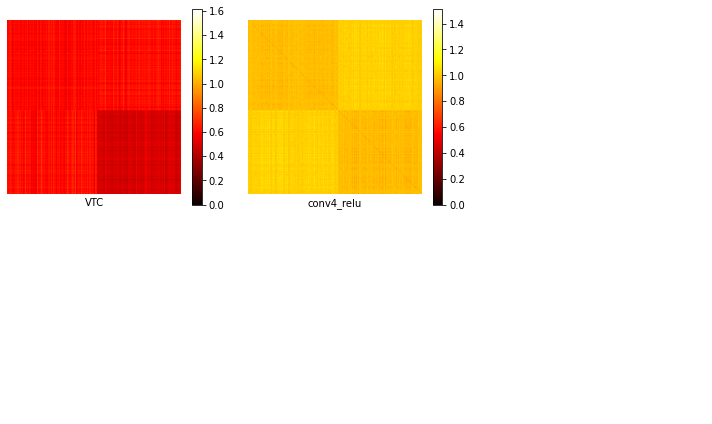

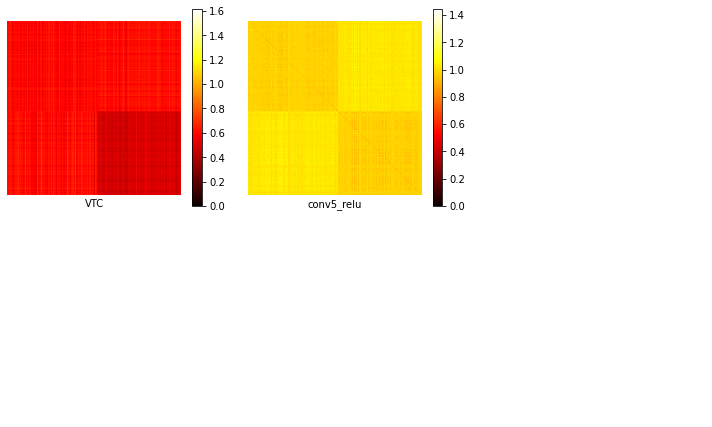

In [ ]:
import numpy as np
from dnnbrain.dnn.core import RDM, Stimulus
from dnnbrain.utils.plot import imgarray_show

# load RDMs
for i in range(2, 6):
  brdm = RDM()
  brdm.load('beta_rh_VTC.rdm.h5')
  drdm = RDM()
  drdm.load('AlexNet_relu' + str(i) + '_zscore_PCA-100.rdm.h5')

  # get rearrange indices
  stim = Stimulus()
  stim.load('all_5000scenes.stim.csv')
  labels = stim.get('label')
  labels_uniq = np.unique(labels)
  indices = []
  for lbl in labels_uniq:
      indices.extend(np.where(labels == lbl)[0])

  # get brain RDM
  brdm_arr = brdm.get('1', False)
  brdm_arr = brdm_arr + brdm_arr.T
  rdm_arrs = [brdm_arr[indices][:, indices]]
  img_names = ['VTC']

  # get DNN RDMs
  layers = [f'conv' + str(i) + '_relu']
  img_names.extend(layers)
  for layer in layers:
      drdm_arr = drdm.get(layer, False)[0]
      drdm_arr = drdm_arr + drdm_arr.T
      rdm_arrs.append(drdm_arr[indices][:, indices])

  # plot
  imgarray_show(rdm_arrs, 2, 3, cmap='hot', cbar=True,
                frame_on=False, img_names=img_names)

In [ ]:
from scipy.stats import pearsonr
from dnnbrain.dnn.core import RDM

for i in range(2, 6):
  # load RDMs
  brdm = RDM()
  brdm.load('beta_rh_VTC.rdm.h5')
  drdm = RDM()
  drdm.load('AlexNet_relu' + str(i) + '_zscore_PCA-100.rdm.h5')

  # calculate correlation between DNN RDMs and brain RDM.
  layers = [f'conv' + str(i) + '_relu']
  brdm_arr = brdm.get('1', True)
  for idx, layer in enumerate(layers):
      drdm_arr = drdm.get(layer, True)[0]
      corr = pearsonr(brdm_arr, drdm_arr)[0]
      print(f'VTC corr {layer}: {corr}')

VTC corr conv2_relu: 0.10016124289163787
VTC corr conv3_relu: 0.12060560123887051
VTC corr conv4_relu: 0.154884140231628
VTC corr conv5_relu: 0.16566037062553562


In [ ]:
%cd /content/dnnbrain/tutorial/visual

/content/dnnbrain/tutorial/visual


In [ ]:
!dnn_topstim -net AlexNet -top 2 -stim all_5000scenes.stim.csv -layer fc3 -chn 3 -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of fc3: 8/4916
Extracted activation of fc3: 16/4916
Extracted activation of fc3: 24/4916
Extracted activation of fc3: 32/4916
Extracted activation of fc3: 40/4916
Extracted activation of fc3: 48/4916
Extracted activation of fc3: 56/4916
Extracted activation of fc3: 64/4916
Extracted activation of fc3: 72/4916
Extracted activation of fc3: 80/4916
Extracted activation of fc3: 88/4916
Extracted activation of fc3: 96/4916
Extracted activation of fc3: 104/4916
Extracted activation of fc3: 112/4916
Extracted activation of fc3: 120/4916
Extracted activation of fc3: 128/4916
E

In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01494475_6207.JPEG
/content/dnnbrain/data/Presented_Stimuli/COCO/COCO_train2014_000000001308.jpg
Images for channel 26


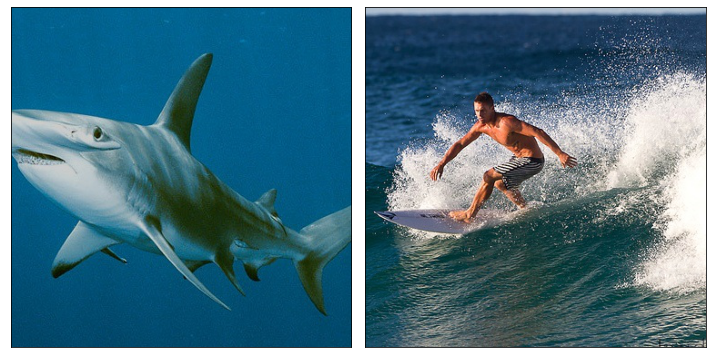

In [ ]:
import numpy as np

from os.path import join as pjoin
from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

ids = [26];
file_names = ["fc3_chn3_top2.stim.csv"]

for i in range(1):
  stim = Stimulus()
  stim.load(file_names[i])
  img_arrs = []
  for j in range(2):
      ori_file = pjoin(stim.header['path'], stim.get('stimID')[j])   
      print(ori_file)   
      img_arrs.append(plt.imread(ori_file))

  print("Images for channel {}".format(ids[i]))
  imgarray_show(img_arrs, nrows=1, ncols=2)

In [ ]:
### Occluder Map ###
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import OccluderDiscrepancyMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01494475_6207.JPEG')
image = image.reshape(3, 375, 375)               
#print(image.reshape(3, 375, 375).shape)
# Using slide-window (sw) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
oc_estimator = OccluderDiscrepancyMapping(dnn, 'fc3', 4)
oc_estimator.set_params(window=(11,11), stride=(2,2), metric='max')
img_out = oc_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('n01494475_6207_rf_sw.JPEG')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Streaming output truncated to the last 5000 lines.
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of fc3: 1/1
Extracted activation of f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import UpsamplingActivationMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01494475_6207.JPEG')
image = image.reshape(3, 375, 375)  
# Using up-sampling(us) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'conv5', 122)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.95)
img_out = up_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('n01494475_6207_rf_us.JPEG')

Extracted activation of conv5: 1/1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:

import torch

In [ ]:
 if torch.cuda.is_available():
      device = 'cuda'
 else:
      device = 'cpu'

In [ ]:
### Empirical Map ###
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.core import Stimulus
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import EmpiricalReceptiveField, UpsamplingActivationMapping

# Prepare DNN and stimulus
dnn = AlexNet()
stim = Stimulus()
dnn.cuda()
stim.load('fc3_chn3_top2.stim.csv')

# Visualizing empirical receptive field using up-sampling(us) engine
# which displays the receptive field that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'fc3', 4)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.50)
emp_rf = EmpiricalReceptiveField(up_estimator)
img_out = emp_rf.compute(stim)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('empirical_rf.JPEG')

AttributeError: ignored